   Height  Weight  Age  Gender
0     170      65   30       1
1     165      59   25       0
2     180      75   35       1
3     175      68   28       1
4     160      55   22       0
5     172      70   32       1
6     168      62   27       0
7     177      74   33       1
8     162      58   24       0
9     158      54   21       0


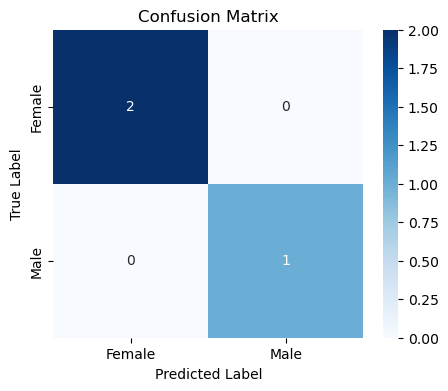

In [2]:
##Author: panthadeep_b; Time: 21.49 IST - 5.Oct.25
##WAP to implement Principal Component Analysis Source: GFG.org

import sys
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

## Create a small custom dataset with 3 features
data = {
    'Height': [170, 165, 180, 175, 160, 172, 168, 177, 162, 158],
    'Weight': [65, 59, 75, 68, 55, 70, 62, 74, 58, 54],
    'Age': [30, 25, 35, 28, 22, 32, 27, 33, 24, 21],
    'Gender': [1, 0, 1, 1, 0, 1, 0, 1, 0, 0]  # 1 = Male, 0 = Female
}

df = pd.DataFrame(data);
print(df);


#Standardizing the data
x = df.drop('Gender', axis=1);
y = df['Gender'];

std = StandardScaler();
x_scaled = std.fit_transform(df); ##Z-score normalization, mean = 0; stdev = 1


##Applying the PCA
pca = PCA(n_components = 2); ##Reduce from 3D to 2D
x_pca = pca.fit_transform(x_scaled);

x_train, x_test, y_train, y_test = train_test_split(x_pca, y, test_size = 0.3, random_state = 42);

model = LogisticRegression();
model.fit(x_train, y_train);

y_pred = model.predict(x_test);


## Model evaluation
cm = confusion_matrix(y_test, y_pred);

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Female', 'Male'], yticklabels=['Female', 'Male'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()



